# Project 2
Vasanth Rajasekaran and Sam Childs

## Collaboration Plan
To facilitate collaboration, Sam and I have set up a private Github repository to share workbooks and data. We will ensure that each commit to the Git repo will include thorough comments documenting the changes. We also have frequent calls to check in on our progress and help eachother out if there are any areas where one is stuck.

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Part 1 - Wrangling
## Problem 1

In [4]:
q = 'SELECT Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, ((CAST(Teams.W as REAL)/Teams.G) * 100) as winning_percentage, sum(Salaries.salary) as total_payroll FROM Teams, Salaries WHERE Teams.teamID == Salaries.teamID AND Teams.yearID == Salaries.yearID GROUP BY Teams.yearID, Teams.teamID'
t = pd.read_sql(q, conn)
t

,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
0,ATL,1985,ATL,66,162,40.740741,14807000.0
1,BAL,1985,BAL,83,161,51.552795,11560712.0
2,BOS,1985,BOS,81,163,49.693252,10897560.0
3,CAL,1985,ANA,90,162,55.555556,14427894.0
4,CHA,1985,CHW,85,163,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,SLN,2014,STL,90,162,55.555556,120693000.0
854,TBA,2014,TBD,77,162,47.530864,72689100.0
855,TEX,2014,TEX,67,162,41.358025,112255059.0
856,TOR,2014,TOR,83,162,51.234568,109920100.0


,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
2,BOS,1985,BOS,81,163,49.693252,10897560.0
28,BOS,1986,BOS,95,161,59.006211,14402239.0
54,BOS,1987,BOS,78,162,48.148148,10144167.0
80,BOS,1988,BOS,89,162,54.938272,13896092.0
106,BOS,1989,BOS,83,162,51.234568,17481748.0
132,BOS,1990,BOS,88,162,54.320988,20558333.0
158,BOS,1991,BOS,84,162,51.851852,35167500.0
184,BOS,1992,BOS,73,162,45.061728,43610584.0
210,BOS,1993,BOS,80,162,49.382716,37120583.0
238,BOS,1994,BOS,54,115,46.956522,37859084.0


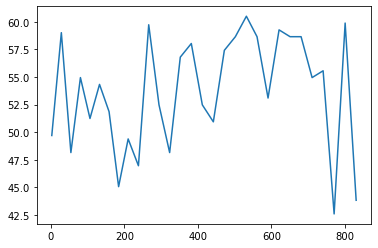

In [5]:
a = t[t.teamID == 'BOS']
a.winning_percentage.plot.line(x='yearID') # Is this plot meant to answer Part 2 Problem 2? it doesn't feel right
a

In this query we are getting six pieces of data from the db: Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, and Salaries.salary from the Teams and Salaries tables. We then make sure we are calculating the correct payroll by matching the teamID and yearID between both tables. By matching, we are ensured we only populate the new table with teams that have salary data, which are teams after 1985. Thus no teams with missing salary or other data are included in our new table. 

# Part 2: Exploratory Data Analysis
## Problem 2

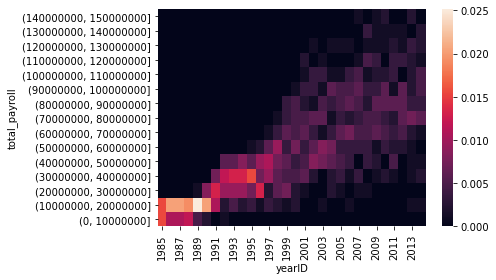

In [6]:
# Single plot of distributions:
# Maybe a heatmap would be good here...
bins = [0,10000000,20000000,30000000,40000000,50000000,60000000, 70000000, 80000000, 90000000, 100000000,110000000, 120000000, 130000000, 140000000, 150000000]
binRoll = pd.cut(t['total_payroll'], bins=bins )
data = pd.crosstab(binRoll,t.yearID, normalize = True)
heat = sb.heatmap(data) #If I can figure out how to make the crosstab use buckets, vmin\|/
heat.invert_yaxis()

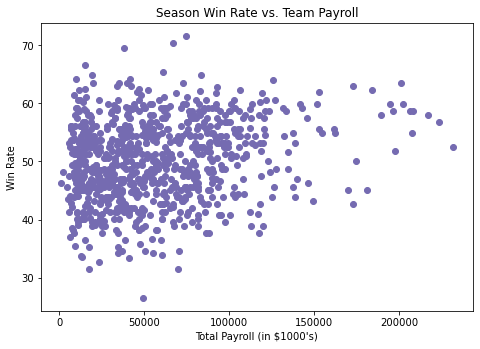

In [7]:
# Scatter Plot for Win percentage as a function of total payroll
x = t.total_payroll / 1000
y = t.winning_percentage

fig = plt.figure()
payWin = fig.add_axes([0,0,1,1])
payWin.scatter(x,y, color = "#756bb1")
payWin.set_xlabel('Total Payroll (in $1000\'s)')
payWin.set_ylabel('Win Rate')
payWin.set_title('Season Win Rate vs. Team Payroll')
plt.show()


## Question 1
From our heat map we can clearly see there is an increase in the mean of payrolls as time passes. Inititally most teams were under 10 million in terms of payroll in the 80s but now most teams are over 70 million.

From the scatter plot we can see that payroll does increase the average win rate but a little, however, the spread is not linear.

## Problem 3

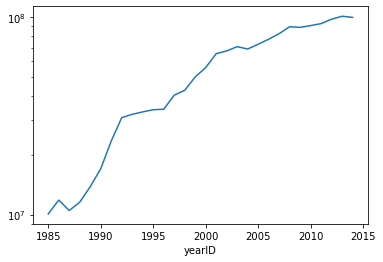

In [8]:
t.groupby(['yearID']).total_payroll.mean().plot(logy=True)

The above plot shows the average payroll by year and is scaled logrithmically. We can clearly see a increase over time in the size of payrolls

## Problem 4

In [18]:
# bins = pd.IntervalIndex.from_tuples([(1990, 1995),(1995,2000),(2000,2005),(2005,2010),(2010, 2014)])
v = t.copy()
bins = [1990,1995,2000,2005,2010,2015]
labels = ['90-94','95-99', '00-04','05-09','10-14']
v['interval'] = pd.cut(t.yearID,bins, labels=labels).dropna()
# we take averages of teams within the 5 year intervals and plot

,teamID,yearID,franchID,W,G,winning_percentage,total_payroll,interval
156,ATL,1991,ATL,94,162,58.024691,18403500.0,90-94
157,BAL,1991,BAL,67,162,41.358025,17519000.0,90-94
158,BOS,1991,BOS,84,162,51.851852,35167500.0,90-94
159,CAL,1991,ANA,81,162,50.000000,33060001.0,90-94
160,CHA,1991,CHW,87,162,53.703704,16919667.0,90-94
...,...,...,...,...,...,...,...,...
287,SEA,1995,SEA,79,145,54.482759,36481311.0,90-94
288,SFN,1995,SFG,67,144,46.527778,36462777.0,90-94
289,SLN,1995,STL,62,143,43.356643,37101000.0,90-94
290,TEX,1995,TEX,74,144,51.388889,34581451.0,90-94


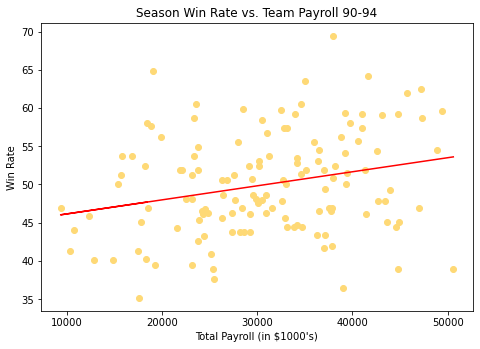

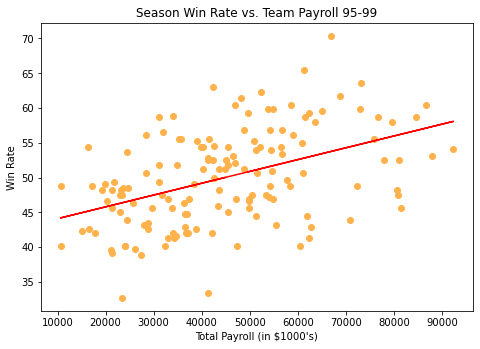

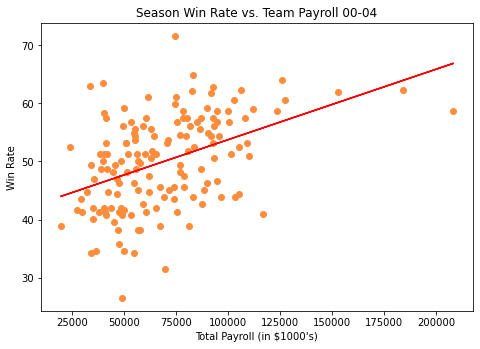

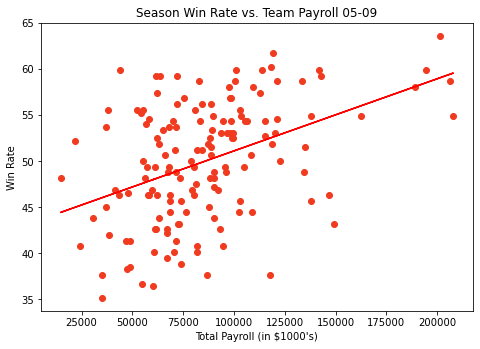

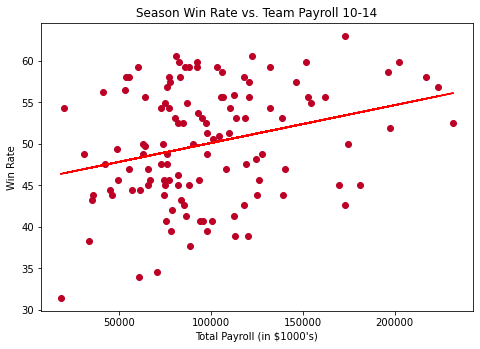

In [36]:
# bins is an iterable for the intervals we want
colors = ['#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
for per in range(5): #Loop for producing 5 charts
    temp = v[v.interval == labels[per]]
    x = temp.total_payroll / 1000
    y = temp.winning_percentage

    fig = plt.figure()
    payWin = fig.add_axes([0,0,1,1])
    payWin.scatter(x,y, color = colors[per])
    payWin.set_xlabel('Total Payroll (in $1000\'s)')
    payWin.set_ylabel('Win Rate')
    payWin.set_title('Season Win Rate vs. Team Payroll ' + str(labels[per]))

    x = np.asarray(x)
    y = np.asarray(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.plot(x, intercept + slope*x, 'r', label='fitted line')
    plt.show()
    